Hausaufgabe 1 Gruppe S

In [1]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt
import sounddevice as sd
import pyfar as pf


ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

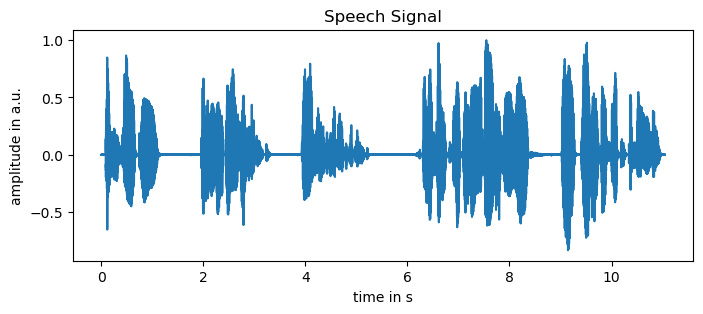

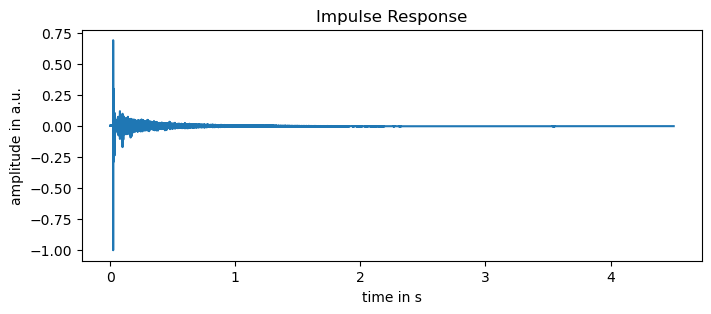

In [2]:
# Aufgabe 1



# read audio data using pyfar
speech = pf.io.read_audio("./speech.wav")
ir = pf.io.read_audio("./impulse_response.wav")

# normalisieren
speech = pf.dsp.normalize(speech)
ir = pf.dsp.normalize(ir)

# Vektor für X-Achse
time_speech = np.array(np.arange(0,speech.n_samples,1)) /speech.sampling_rate
time_ir = np.array((np.arange(0,ir.n_samples,1))) / ir.sampling_rate


# Plot
plt.figure(figsize=(8,3))
plt.plot(time_speech, speech.time[0])
plt.title("Speech Signal")
plt.xlabel("time in s") 
plt.ylabel("amplitude in a.u.")
plt.show()

plt.figure(figsize=(8,3))
plt.plot(time_ir,ir.time[0])
plt.title("Impulse Response")
plt.xlabel("time in s")
plt.ylabel("amplitude in a.u.")
plt.show()

## Aufgabe 2

- gegeben sind die Funktionen:

$ y_1[n] = 2x[n^2 - 1]$
$y_2[n] = \sqrt{3}x[n]+x[n+2]$
<br>
<br>
- Kausalität, Gedächtnisfreiheit sind nicht gegeben da, beide $y[n]$ von $x[m]$ mit $m > n$ abhängen, damit ist gleichzeotig Rekursivität gegeben 

$y_1[3] = 2x[3^2 -1] = 2x[8]$


$y_2[3] = \sqrt{3}x[3]+x[3+2] = \sqrt{3}[3]+x[5]$
<br>
<br>
- Zeitinvarianz ist nicht gegeben für $y_1$, mit und $b[n] = x[n - n_0]$ folgt

$y_1[n] = 2b[n^2 - 1] = 2x[(n - n_0)^2 -1] = 2x[(n^2 - 1) - 2nn_0 + n_0^2 ] \neq  y[n - n0]$

<br>
<br>

- Linearität benötigt homogenität und additivität für $ g[n] = ax[n] $  

Homogenität ist für beide Fälle gegeben:

$ y_1[n] = 2g[n^2 - 1] = 2ax[n^2 -1] = a(2x[n^2 -1]) = aT{x[n]}$
 
 

$ y_2[n] = \sqrt{3}g[n]+g[n+2] =  \sqrt{3}ax[n]+ax[n+2] = a(\sqrt{3}x[n]+x[n+2]) = aT{x[n]} $

<br>
<br>
Additivität ebenfalls. Mit $f[n] = x_1[n] + x_2[n]$ :

$y_1[n] = 2f[n^2-1] = 2(x_1[n^2-1] + x_2[n^2-1]) = 2x_1[n^2-1] + 2x_2[n^1-1] = T{x_1[n]} +T{x_2[n]} $

<br>
<br>




$y_2[n] =  \sqrt{3}f[n]+f[n+2] =  \sqrt{3}(x_1[n] + x_2[n])+x_1[n+2] + x_2[n] $

$= \sqrt{3}x_1[n] + x_1[n+2] + \sqrt{3}x_2[n] + x_2[n+2] = T{x_1[n]} + T{x_2[n]}$

## Aufgabe 3

## a) 

Damit das System Kausal wird, darf keine abhängigkeit von m > n bestehen   i.e. y[n] = x [m = n+2] 
Wir könnten z.B. wählen, dass n = m - 2 ist, dann finden wir 

$y[m] = 0.2(x[m] + x[m-1] + x[m-2] + x[m-3] + x[m-4])$


wir wissen $h[n] = T\{\delta[n]\} $

$h[-1] = 0$

$h[0] = 0.2( \delta[0] + \delta[-1] + \delta[-2] + \delta[-3] + \delta[-4]) = 0.2$

$h[1] = 0.2( \delta[1] + \delta[0] + \delta[-1] + \delta[-2] + \delta[-3]) = 0.2$

$h[2] = 0.2( \delta[2] + \delta[1] + \delta[0] + \delta[-1] + \delta[-2]) = 0.2$

$h[3] = 0.2( \delta[3] + \delta[2] + \delta[1] + \delta[0] + \delta[-1]) = 0.2$

$h[4] = 0.2( \delta[4] + \delta[3] + \delta[2] + \delta[1] + \delta[0]) = 0.2$

$h[5] = 0$

damit ist $h = [0.2, 0.2, 0.2, 0.2, 0.2]$





# Aufgabe 3b)

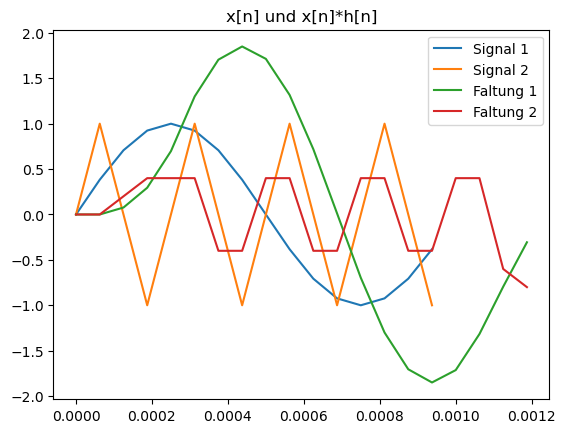

In [19]:
def convolve(a,b):
    """ Funktion bildet die faltung aus zwei arrays a, b und und gibt einen Vektor y zurück """
    
    #y[n] = sum x[k]*h[n-k]
    # In numpy array konvertieren
    a = np.array(a)
    b = np.array(b)

    # vektoren auf gleiche Länge bringen 
    len_a = len(a)
    len_b = len(b)
    pad = len(a) + len(b) - 1

    a = np.pad(a, (0, pad - len_a), mode="constant")
    b = np.pad(b, (0, pad - len_b), mode="constant")


    # einen der beiden Vektoren spiegeln 
    a = a[::-1]    

    y = []
    # Faltung durchführen
 
    for i in np.arange(0,pad,1):

        # integrieren und an y hängen
        y.append(np.sum(a*b))
        
        # um eine stelle verschieben
        a = np.array(a[1:])
        a = np.pad(a, (0,1), mode="constant")
        
    return np.array(y[::-1])



# c) generate sine signals 
fs = 16000  # sampling rate [Hz]
time = np.arange(0,16,1)/fs 
f1 = 1000   #[Hz]
f2 = 4000   #[Hz]

x_1 = np.sin((2*np.pi)*f1 *time)
x_2 = np.sin((2*np.pi)*f2 *time)

# Impulsantwort h[n]

h = np.arange(0,5,1)*0.2


con_1 = convolve(h,x_1)
con_2 = convolve(h,x_2)
time2 = np.arange(0,len(con_1),1)/fs

plt.plot(time, x_1, label="Signal 1")
plt.plot(time, x_2, label= "Signal 2") 
plt.plot(time2, con_1, label="Faltung 1")
plt.plot(time2, con_2, label="Faltung 2")
plt.legend()
plt.title("x[n] und x[n]*h[n]")

plt.show()


# Aufgabe 3 d) 

Verhalten des Systems: 

- Es ist eine Phasenverschiebung zu bemerken. Die Periodenlänge der gefalteten Signale scheinen gleich zu bleiben. 
- Es sind es komische Verformungen an den Rändern der Gefalteten funktion, wohningegen im mittleren Abschnitt ein gewisse Ähnlichkeit zur Orginal funktion erhalten bleibt. 
- Das system ändert die Amplitunde der eingangssignale. Signal 1 wird verstärkt, wohingegen signal 2 abgeschwächt wird. 

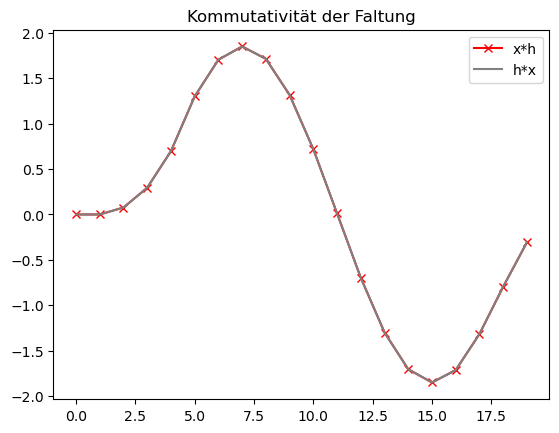

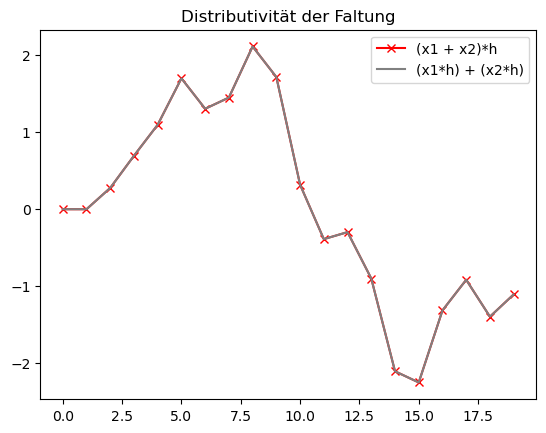

In [45]:
# Aufgabe 3 e) 

# Vektor für x_Achse
x = np.arange(0,len(convolve(x_1,h)),1)

# Plots 

#Kommutativitäts-plot
plt.plot(x, convolve(x_1,h), label = "x*h", marker="x", color="red")
plt.plot(x, convolve(h,x_1), label = "h*x", color ="grey")
plt.title("Kommutativität der Faltung")
plt.legend()
plt.show()

#distributivitäts-plot
plt.plot(x, convolve((x_1 + x_2),h), label = "(x1 + x2)*h", marker="x", color = "red")
plt.plot(x, convolve(x_1,h) + convolve(x_2,h), label = "(x1*h) + (x2*h)", color="grey")
plt.legend()
plt.title("Distributivität der Faltung")
plt.show()

# Aufgabe 4


In [91]:
def rdft(x,fs):
    """Funktion, die eine discrete FFT durchführt. Sie nimmt ein Zeit-signal-vektor x und eine samplingfrequenz fs entgegen.
    Sie leifert die einseitige DFT und den dazugehörigen Frequenzvektor"""
    N = len(x)
    dft = []
    
    for m in np.arange(0,N//2+1,1):
        am = 0
        
        for n in np.arange(0,N,1):
            am += (1/N) * np.exp( (-1j * 2*np.pi/ N) *n *m ) * x[n]
        dft.append(am)

    freq = np.arange(0, len(x)//2 +1, 1) * 1/len(x) *fs
    return dft, freq



## 4 a) & b)    --> zuerst Aufgabe 5 ausführen, Aufgabe 4 greift zum Test von rdft auf Varibalen aus Aufgbae 5 zu  

Dauer unser dft:            7.771 ms
Dauer der numpy rfft:       5.324 ms 
Dauer der numpy rfftfreq:   1.004 ms

Ausgelesene Frequenz: 15000.0


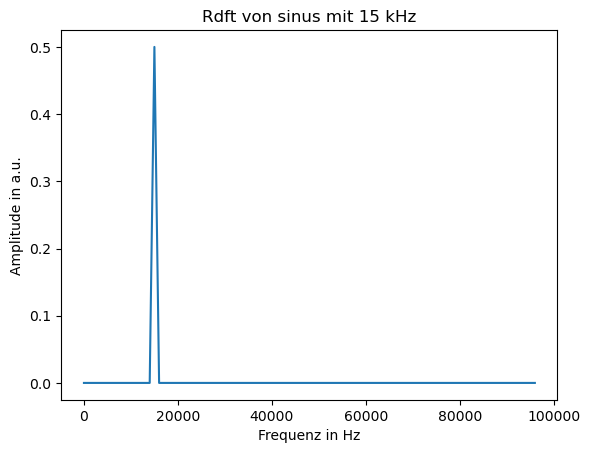

In [114]:
import timeit

# Erstelle 6 Sample langes Noise signal
Noise=[1024, 1025, 1026, 1027, 4096, 8192]


# Durchführung der Funktionen
diy_dft, freq1 = rdft(Noise,1)
rfft = np.fft.rfft(Noise)
rfft_freq = np.fft.rfftfreq(len(Noise))


# Werte vergleichen
#np.testing.assert_allclose(diy_dft, rfft, atol=0.2)

# Timewerte der Funktionen ermitteln
diy_time = timeit.timeit(lambda: rdft(Noise, 1), number=5)
rfftfreq_time = timeit.timeit(lambda: np.fft.fftfreq(len(Noise), 1), number=5)
rfft_time = timeit.timeit(lambda: np.fft.rfft(Noise), number=5)


# Zeitwerte ausgeben
print(f"Dauer unser dft:            {np.round(diy_time*10e3,3)} ms")
print(f"Dauer der numpy rfft:       {np.round(rfft_time*10e3,3)} ms ")
print(f"Dauer der numpy rfftfreq:   {np.round(rfftfreq_time*10e3,3)} ms")





# Anwenden von rdft auf Aufgabe 5 sin2 (15kHz, gesampelt mit 192kHz)
x, frequenz = rdft(sin2,fs2)

# x vom komplexen ins Reelle abbilden via np.abs
x = np.abs(x)

# Plotten des Ergebnis
plt.plot(frequenz,x)
plt.title("Rdft von sinus mit 15 kHz")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude in a.u.")
print()
print(f"Ausgelesene Frequenz: {frequenz[np.argmax(x)]}")


## Besprechung 


- Die np.testing funktion Funktioniert liefert eine Fehlermeldung, jedoch liefert die rdft funktioniert für das Sinussignal aus Aufgabe 5 den korrekten Wert von 15 kHz. Auch der Plot sieht aus wie es von einem Frequenzspektrum einer sinusfunktion zu erwarten ist. 

- Es liegt hier wahrschenlich nicht an der Implementierung der Funktion rdft, sondern an etwas anderem.  
 

## Aufgabe 5

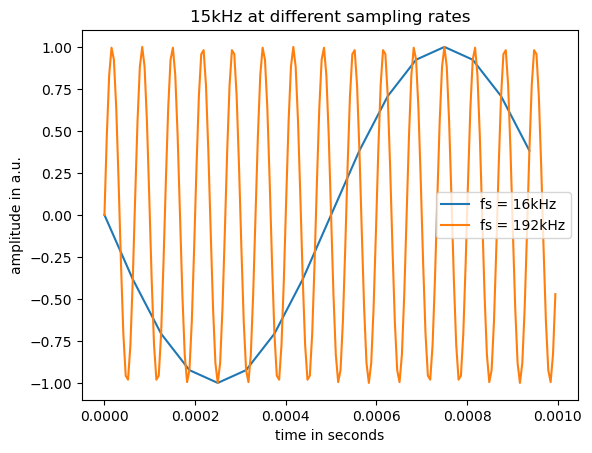

In [110]:
frequency = 15000
fs1 = 16000
fs2 = 192000
fs3 = 33000

# Zeitvektoren
time1 = np.arange(0,16,1)
time2 = np.arange(0,192,1)
#time3 = np.arange(0,33,1)

# signale
sin1 = np.sin(2*np.pi*frequency*time1/fs1)
sin2 = np.sin(2*np.pi*frequency*time2/fs2)
#sin3 = np.sin(2*np.pi*frequency*time3/fs3)
# plot
plt.plot(time1/fs1,sin1, label="fs = 16kHz")
plt.plot(time2/fs2,sin2, label= "fs = 192kHz")
#plt.plot(time3/fs3, sin3, label= "fs = 30kHz")
plt.title("15kHz at different sampling rates")
plt.xlabel("time in seconds")
plt.ylabel("amplitude in a.u.")
plt.legend()
plt.show()

Aliasing:

Beim Abtasten einer periodischen Funktion exisitiert folgendes Problem: Wenn die Abtastrate nicht schneller ist als die Periode des Signals, 
dann durchläuft das Signal zwischen jedem Samplingwert mehr als einen durchlauf. Abgetastet wird deshalb die Differenzfrequenz vom Signal und des Semplingvorgangs. 

Das ist gut zu sehen. 15kHz durchläuft pro ms 15 Zyklen. Diese können ausreichend gut mit 192kHz abgebildet werden, da wir pro Periode mit knapp 29 (192kHz / 15kHz) Samples abtatsten. Für eine Abtastrate von 16kHz, sehen wir eine Differenzenfrequenz von 1kHz, dementsprechend erhält man einen sinus mit 1kHz, also ein signal das genau eine Periode pro Millisekunde durchläuft. 


Anmerkung, ich bin mir nicht ganz sicher, ob wir hier wirklich "das Aliasing Problem" haben. Laut sampling therorem können wir jede Frequenz bis fs/2 richtig rekonstruieren. Mit 33kHz exisiteren aber weiterhin deutliche Fehler. Ich glaube was hier fehlt, ist, dass die Rekonstruktion eines Signals über eine Fourierreihe gemacht wird und nicht durch einen linearen Plot.  